In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from string import punctuation

from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
#nltk.download('punkt')

In [2]:
file = open('photo.json', 'r')

In [3]:
stop = 200000
all_data = []

for i, line in enumerate(file):
    if i%200000 == 0:
        print(i)
    if i == stop:
        break
    
    data = json.loads(line)
    
    caption = data['caption']
    label = data['label']
    
    all_data.append([caption, label])
    
df = pd.DataFrame(all_data, columns = ['caption', 'label'])

file.close()

0


In [4]:
df.head(20)

,caption,label
0,,inside
1,,inside
2,,food
3,,inside
4,,inside
5,,outside
6,,outside
7,,inside
8,,inside
9,,inside


In [5]:
labels = df['label'].value_counts()

In [6]:
labels

food       114874
inside      52448
drink       18121
outside     11534
menu         3023
Name: label, dtype: int64

<BarContainer object of 5 artists>

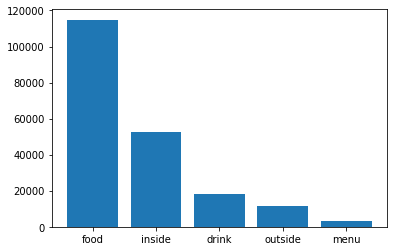

In [9]:
plt.bar(labels.index, labels)

In [10]:
captions = df['caption'].str.lower()
captions_counts = Counter(word_tokenize('\n'.join(captions)))
captions_counts.most_common(50)

[(',', 20559),
 ('.', 19036),
 ('!', 17456),
 ('the', 14068),
 ('and', 13340),
 ('with', 8926),
 ('chicken', 6623),
 ('of', 6171),
 ("'s", 5767),
 ('a', 5743),
 (')', 4795),
 ('&', 4615),
 ('(', 4149),
 (':', 3801),
 ('-', 3755),
 ('in', 3501),
 ('on', 3229),
 ('for', 3164),
 ('to', 3043),
 ('bar', 2851),
 ('mcdonald', 2844),
 ('$', 2799),
 ('menu', 2756),
 ('salad', 2648),
 ('?', 2565),
 ('is', 2551),
 ('cheese', 2501),
 ('...', 2246),
 ('at', 2239),
 ('it', 2021),
 ('fried', 1949),
 ('beef', 1856),
 ('good', 1836),
 ('shrimp', 1816),
 ('pork', 1804),
 ('from', 1789),
 ('this', 1763),
 ('i', 1752),
 ('sauce', 1711),
 ('our', 1698),
 ('great', 1658),
 ('sandwich', 1652),
 ('roll', 1608),
 ('was', 1579),
 ('rice', 1573),
 ('you', 1547),
 ('all', 1517),
 ('breakfast', 1507),
 ('inside', 1497),
 ('meal', 1450)]

In [20]:
top_50_caption_words = captions_counts.most_common(50)

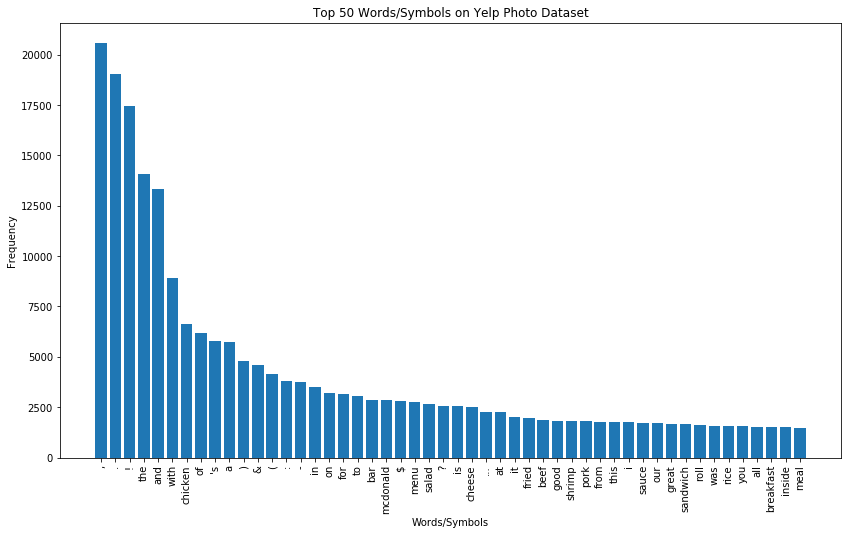

In [27]:
words, counts = zip(*top_50_caption_words)
fig, ax = plt.subplots(1,1,figsize = (14, 8))
ax.bar(words, counts, align='center')
ax.set_xlabel('Words/Symbols')
ax.set_ylabel('Frequency')
ax.set_title("Top 50 Words/Symbols on Yelp Photo Dataset")
ax.set_xticklabels(words, rotation=90);